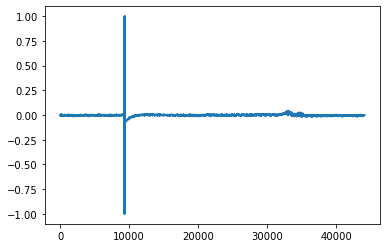

[1 0 1 1 1 1 0 1 0 1 0 1 1 1 1 0 1 0 1 1 1 1 0 1 0 1 1 1]
½^½


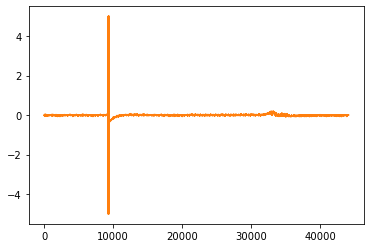

In [96]:
import comnumfip2
from importlib import reload
import sounddevice as sd
import numpy as np
import matplotlib.pyplot as plt
import soundfile as sf

reload(comnumfip2)

fs=44100
duration=1
analog_test =[]
while len(analog_test)==0:
    analog = sd.rec(int(duration*fs),samplerate=fs,channels=1)
    sd.wait()
    #Filtre de réception
    mask = (analog<-0.9) | (analog>0.9) #On garde tout ce qui a une amplitude de plus de 0.9V
    analog_test = analog[mask]



plt.plot(analog)
plt.show()

fe=44100
t= np.arange(0,1/10000,1/fe)
motif = np.where((t<=(1/10000)),1,0)

plt.plot(motif)

analog=analog.flatten()

filtered_signal = np.correlate(analog, motif, mode='same')


plt.plot(filtered_signal)

bin=comnumfip2.sample_and_threshold(analog_test,0.9)
print(bin)
print(comnumfip2.bin2ascii(bin))


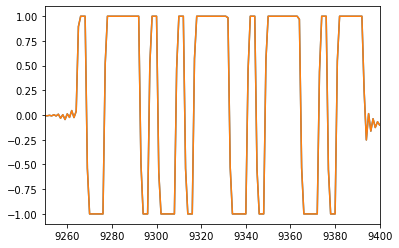

[1 0 1 1 1 1 0 1 0 1 0 1 1 1 1 0 1 0 1 1 1 1 0 1 0 1 1 1]
½^½


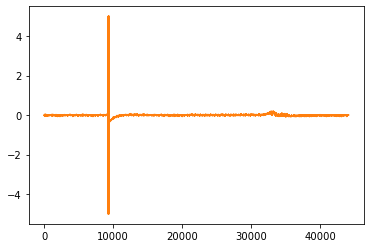

In [126]:
import comnumfip2
from importlib import reload
import sounddevice as sd
import numpy as np
import matplotlib.pyplot as plt
import soundfile as sf

reload(comnumfip2)


plt.plot(analog)
plt.xlim(9200,9500)
#plt.plot(filtered_signal)
plt.xlim(9250,9400)

plt.plot(analog)
plt.show()

fe=44100
t= np.arange(0,1/10000,1/fe)
motif = np.where((t<=(1/10000)),1,0)

plt.plot(motif)

analog=analog.flatten()

filtered_signal = np.correlate(analog, motif, mode='same')


plt.plot(filtered_signal)

bin=comnumfip2.sample_and_threshold(analog_test,0.9)
print(bin)
print(comnumfip2.bin2ascii(bin))